Logistic Regression, XGBoost, K-NN and Random Forest 

We will be implementing a numerous of models for sentiment analysis on tweets. Given a tweet, we will decide if it has a positive sentiment or a negative one. Specifically we will: 

* Learn how to extract features for all models given some text
* Implement all models from scratch
* Apply those models on a natural language processing task
* Test using your models

We will be using a data set of tweets. Hopefully we will get more than 99% accuracy.  
Run the cell below to load in the packages.

## Import functions and data

In [2]:
# run this cell to import nltk
import nltk
from os import getcwd

### Imported functions

Download the data needed for this notebook. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).


#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: this counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label '1' or a negative label '0', then builds the `freqs` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [3]:
import numpy as np
import pandas as pd
from utils import process_tweet, build_freqs

### Prepare the data

In [4]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [5]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'],
                                                    test_size=0.20,
                                                    random_state=0)

* Train test split: 20% will be in the test set, and 80% in the training set.


In [7]:
# Print the shape train and test sets
print("train_y.shape = " + str(y_train.shape))
print("test_y.shape = " + str(y_test.shape))

train_y.shape = (24588,)
test_y.shape = (6148,)


* Create the frequency dictionary using the imported `build_freqs()` function.  
    * It is highly recommend that you open `utils.py` and read the `build_freqs()` function to understand what it is doing.

```Python
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
```
* Notice how the outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
* The `freqs` dictionary is the frequency dictionary that's being built. 
* The key is the tuple (word, label), such as ("happy",1) or ("happy",0).  The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [8]:
# create frequency dictionary
freqs = build_freqs(X_train, y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 25115


### Process Amazon Reports
The given function `process_tweet()` tokenizes the report into individual words, removes stop words and applies stemming.

In [9]:
# test the function below
print('This is an example of a positive report: \n', X_train.iloc[0])
print('\nThis is an example of the processed version of the report: \n', process_tweet(X_train.iloc[0]))

This is an example of a positive report: 
 Just what I wanted

This is an example of the processed version of the report: 
 ['want']


## Extracting the features
* Given a list of reports, extract the features and store them in a matrix. We will extract two features.
    * The first feature is the number of positive words in a report.
    * The second feature is the number of negative words in a report. 
* Then train your models on these features.
* Test the classifier on a validation set.
### Instructions: Implement the extract_features function. 
* This function takes in a single report.
* Process the report using the imported `process_tweet()` function and save the list of report words.
* Loop through each word in the list of processed words
    * For each word, check the `freqs` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

In [10]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [11]:
# test 1:
# test on training data
tmp1 = extract_features(X_train.iloc[0], freqs)
print(tmp1)

[[1.000e+00 1.246e+03 4.560e+02]]


In [12]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


## Training All Models

To train the model:
* Stack the features for all training examples into a matrix `X`.
* Train the logistic regression model

In [13]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :]= extract_features(X_train.iloc[i], freqs)

# training labels corresponding to X
Y = y_train

In [14]:
#First Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, 
                             penalty='l2', 
                             solver='liblinear', 
                             max_iter=100, 
                             random_state=0)
log_reg.fit(X, Y.ravel())

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
#Second Model: XGBoost
import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=3, 
                              learning_rate=0.1,  
                              n_estimators=100,
                              random_state=0)

model_xgb.fit(X, Y.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [16]:
#Third Model: K-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3, 
                                 metric='euclidean',
                                 weights='uniform',
                                 algorithm='brute')

model_knn.fit(X, Y.ravel())

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3)

In [17]:
#Fourth Model: Random Forest 
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, 
                                  max_depth=5, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  bootstrap=True)

model_rf.fit(X, Y.ravel())

RandomForestClassifier(max_depth=5)

In [18]:
# Run this cell to test your function with Logistic Regression
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print(f'{tweet} -> {log_reg.predict_proba(extract_features(tweet, freqs=freqs))}')

I am happy -> [[0.39007517 0.60992483]]
I am bad -> [[0.60881728 0.39118272]]
this movie should have been great. -> [[0.0323443 0.9676557]]
great -> [[0.03328097 0.96671903]]
great great -> [[0.0011838 0.9988162]]
great great great -> [[4.08012951e-05 9.99959199e-01]]
great great great great -> [[1.40471757e-06 9.99998595e-01]]


In [19]:
# Run this cell to test your function with XGBoost
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print(f'{tweet} -> {model_xgb.predict_proba(extract_features(tweet, freqs=freqs))}')

I am happy -> [[0.06517243 0.93482757]]
I am bad -> [[0.80947804 0.19052196]]
this movie should have been great. -> [[0.01844871 0.9815513 ]]
great -> [[0.017712 0.982288]]
great great -> [[0.01951808 0.9804819 ]]
great great great -> [[0.01988697 0.980113  ]]
great great great great -> [[0.00624168 0.9937583 ]]


In [20]:
# Run this cell to test your function with K-Nearest Neighbors
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print(f'{tweet} -> {model_knn.predict_proba(extract_features(tweet, freqs=freqs))}')

I am happy -> [[0. 1.]]
I am bad -> [[1. 0.]]
this movie should have been great. -> [[0. 1.]]
great -> [[0. 1.]]
great great -> [[0. 1.]]
great great great -> [[0. 1.]]
great great great great -> [[0. 1.]]


In [21]:
# Run this cell to test your function with Random Forest
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print(f'{tweet} -> {model_rf.predict_proba(extract_features(tweet, freqs=freqs))}')

I am happy -> [[0.09669209 0.90330791]]
I am bad -> [[0.45529362 0.54470638]]
this movie should have been great. -> [[0.03578267 0.96421733]]
great -> [[0.03300351 0.96699649]]
great great -> [[0.04551504 0.95448496]]
great great great -> [[0.1121793 0.8878207]]
great great great great -> [[0.11073495 0.88926505]]


In [22]:
# Feel free to check the sentiment of your own tweet below: Logistic Regression
my_tweet = 'I am learning :)'
log_reg.predict_proba(extract_features(my_tweet, freqs=freqs))

array([[0.4590175, 0.5409825]])

In [23]:
# Feel free to check the sentiment of your own tweet below: XGBoost
my_tweet = 'I am learning :)'
model_xgb.predict_proba(extract_features(my_tweet, freqs=freqs))

array([[0.06580019, 0.9341998 ]], dtype=float32)

In [24]:
# Feel free to check the sentiment of your own tweet below: K-Nearest Neighbors
my_tweet = 'I am learning :)'
model_knn.predict_proba(extract_features(my_tweet, freqs=freqs))

array([[0.33333333, 0.66666667]])

In [25]:
# Feel free to check the sentiment of your own tweet below: Random Forest
my_tweet = 'I am learning :)'
model_rf.predict_proba(extract_features(my_tweet, freqs=freqs))

array([[0.07831635, 0.92168365]])

## Check performance using the test set


In [26]:
#Importing Metrics for all Models 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [27]:
# collect the features 'x' and stack them into a matrix 'X'
X_te = np.zeros((len(X_test), 3))
for i in range(len(X_test)):
    X_te[i, :]= extract_features(X_test.iloc[i], freqs)

# training labels corresponding to X
Y_te = y_test

In [28]:
#Predictions with Logistic Regression
y_pred = log_reg.predict(X_te)

log_reg_accuracy = accuracy_score(Y_te, y_pred)
log_reg_precision = precision_score(Y_te, y_pred)
log_reg_recall = recall_score(Y_te, y_pred)
log_reg_f1 = f1_score(Y_te, y_pred)

# Print the results
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:",log_reg_f1)

# Optionally, you can print the confusion matrix
conf_matrix = confusion_matrix(Y_te, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8651594014313598
Precision: 0.917550839964633
Recall: 0.901020186672455
F1 Score: 0.9092103822144343
Confusion Matrix:
[[1168  373]
 [ 456 4151]]


In [29]:
#Predictions with XGBoost
y_pred = model_xgb.predict(X_te)

xgb_accuracy = accuracy_score(Y_te, y_pred)
xgb_precision = precision_score(Y_te, y_pred)
xgb_recall = recall_score(Y_te, y_pred)
xgb_f1 = f1_score(Y_te, y_pred)

# Print the results
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

# Optionally, you can print the confusion matrix
conf_matrix = confusion_matrix(Y_te, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8388093689004554
Precision: 0.8476923076923077
Recall: 0.9568048621662687
F1 Score: 0.8989497297848476
Confusion Matrix:
[[ 749  792]
 [ 199 4408]]


In [30]:
#Predictions with KNN
y_pred = model_knn.predict(X_te)

knn_accuracy = accuracy_score(Y_te, y_pred)
knn_precision = precision_score(Y_te, y_pred)
knn_recall = recall_score(Y_te, y_pred)
knn_f1 = f1_score(Y_te, y_pred)

# Print the results
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

# Optionally, you can print the confusion matrix
conf_matrix = confusion_matrix(Y_te, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8630448926480156
Precision: 0.9030186255619782
Recall: 0.9155632732797916
F1 Score: 0.9092476826902348
Confusion Matrix:
[[1088  453]
 [ 389 4218]]


In [32]:
#Predictions with Random Forest
y_pred = model_rf.predict(X_te)

rf_accuracy = accuracy_score(Y_te, y_pred)
rf_precision = precision_score(Y_te, y_pred)
rf_recall = recall_score(Y_te, y_pred)
rf_f1 = f1_score(Y_te, y_pred)

# Print the results
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

# Optionally, you can print the confusion matrix
conf_matrix = confusion_matrix(Y_te, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7747234873129473
Precision: 0.7714863498483316
Recall: 0.9937052311699588
F1 Score: 0.8686082914334503
Confusion Matrix:
[[ 185 1356]
 [  29 4578]]


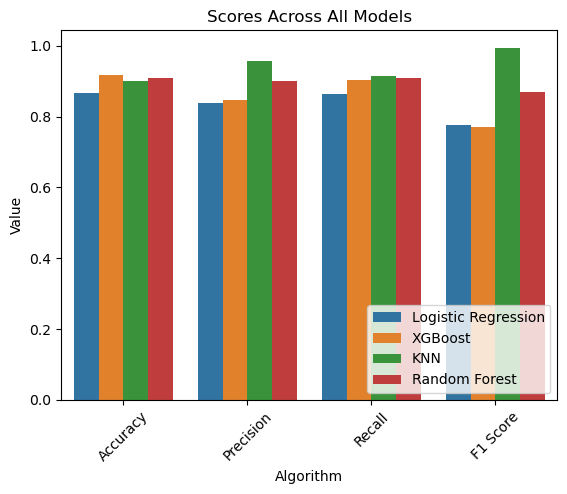

In [38]:
#Plot the Results of Every Model
import matplotlib.pyplot as plt
import seaborn as sns

scores_dict = {'Accuracy': [0.865159, 0.838809,  0.863044,  0.774723],
              'Precision': [0.917550,  0.847692,  0.903018,  0.771486],
              'Recall': [0.901020, 0.956804,  0.915563,  0.993705],
              'F1 Score': [0.909210,  0.898949,  0.909247,  0.868608]}

#Turn the dictionary into DataFrame
scores_df = pd.DataFrame(scores_dict)
scores = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = ['Logistic Regression', 'XGBoost', 'KNN', 'Random Forest']
scores_df.columns = model_names 
scores_df.index = scores 

#Turn df to long format
df_long = scores_df.stack().reset_index().rename(columns={'level_0': 'Algorithm', 'level_1': 'Metric', 0: 'Value'})

#Grouped bar chart
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_long)
plt.title("Scores Across All Models")
plt.legend(loc='lower right')
plt.xticks(rotation=45) 
plt.show()

# Part 5: Predict with your own tweet

In [34]:
# Feel free to change the tweet below: Logistic Regression
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = log_reg.predict_proba(extract_features(my_tweet, freqs=freqs))[0, 1]
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
0.4666919183625057
Negative sentiment


In [35]:
# Feel free to change the tweet below: XGBoost
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = model_xgb.predict_proba(extract_features(my_tweet, freqs=freqs))[0, 1]
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
0.6283837
Positive sentiment


In [39]:
# Feel free to change the tweet below: KNN
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = model_knn.predict_proba(extract_features(my_tweet, freqs=freqs))[0, 1]
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
0.0
Negative sentiment


In [40]:
# Feel free to change the tweet below: Random Forest
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = model_rf.predict_proba(extract_features(my_tweet, freqs=freqs))[0, 1]
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
0.7040118175450697
Positive sentiment


The sentiment of the tweet we importing is negative, so in this case only Logistic Regression and KNN algorithms found the right sentiment regardless the metric scores.